<h1><center>201821002 이의민 중간고사 대체 과제</center></h1>

<h2><bold>문제 정의:</bold></h2>


주간 인구는 어떤 지역에 낮시간에 존재하며 활동하는 사람들을 가리킨다. 상주인구수는 반면 해당 지역에 행정구역 상 거주지를 두고 살고 있는 상주인구(야간인구)와 대비되는 개념이다.

관련하여 서울시의 지하철역 이용자 수를 분석함으로 출퇴근하는 인원들의 수로 도시의 업무지역과 주거지역을 분류하려고 한다.

업무 지역과 주거지역을 분석함으로 현재의 유동인구가 많은 지역을 파악할 수 있다. 이는 추후 부동산 투자를 할 경우 자산을 어디에 투자하면 좋을 지에 대한 인사이트를 제공한다.

업무지역은 퇴근 시간 이후 사람들이 대부분 주거 지역으로 이동하여 상주 인구가 극단적으로 적어지는 인구 공동화 현상이 일어난다. 상주 인구가 적어질 수록 도시의 치안은 더 나빠진다. 이를 Doughnut pattern 이라고도 한다. 이런 현상이 나타나려고 하는 지역이나 이미 나타난 지역을 구분하려고 한다. 


주거 지역과 업무 지역을 지하철 승하차 승객을 통해 K-means 분석을 진행한다면 업무지역은 업무지역끼리 군집이 될 것이고 주거지역은 주거지역끼리 군집이 될 것이라고 예상한다. 다시 도시가 재기능을 할 수 있도록 미리 예방할 수 있는 좋은 지표가 될 것이라고 예상한다.

<h2><bold>데이터 선택:</bold></h2>
https://www.data.go.kr/data/15048032/fileData.do
서울교통공사_역별 일별 시간대별 승하차인원 정보 데이터를 사용하였다.
데이터는 시간대별 승하차인원 정보를 나타내었고 지하철 호선마다 승하차 고객 수가 기재되어 있다. 승하차 인원의 비율을 비교하여 케이민즈 분석을 실행한다면 업무 주거지역을 구별하는 지표를 찾을 것이라고 생각한다.


In [1]:
import pandas as pd

df = pd.read_csv('서울교통공사_역별 일별 시간대별 승하차인원 정보_20230930.csv', encoding='euc-kr')

df

,연번,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,...,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,...,2282,2295,2526,1930,1897,1487,991,609,280,46
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,...,843,895,959,985,670,630,515,330,146,0
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,...,602,575,533,456,285,267,246,154,79,18
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,...,1145,1402,1223,1272,911,913,906,602,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148790,148791,2023-09-30,8호선,2826,수진,하차,8,0,8,40,...,195,165,136,171,190,178,132,153,162,133
148791,148792,2023-09-30,8호선,2827,모란,승차,39,0,39,34,...,200,189,205,233,219,169,103,137,117,105
148792,148793,2023-09-30,8호선,2827,모란,하차,9,0,9,45,...,132,156,164,165,216,215,176,121,113,113
148793,148794,2023-09-30,8호선,2828,남위례,승차,20,0,20,54,...,184,211,201,214,182,189,112,131,134,105


In [2]:
df.describe()

,연번,역번호,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
count,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,...,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000
mean,74398.000000,1615.073201,131.896576,243.290783,651.356914,1166.834732,993.894089,983.530959,789.427400,713.093874,...,800.089472,878.582943,1080.320710,1381.742774,1079.534877,993.400464,759.964663,596.922437,406.712813,231.558406
std,42953.560989,1172.862603,183.776074,354.583380,1024.569729,1904.198823,1313.571777,1423.153578,927.876575,633.975444,...,705.568729,788.845240,1128.122321,1674.353700,1184.632294,1332.387610,895.597026,705.943090,544.506831,440.875308
min,1.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37199.500000,317.000000,32.000000,2.000000,92.000000,228.000000,292.000000,316.000000,311.000000,316.000000,...,358.000000,388.000000,433.000000,469.000000,374.000000,297.000000,250.000000,196.000000,114.000000,20.000000
50%,74398.000000,2527.000000,67.000000,122.000000,260.000000,533.000000,584.000000,580.000000,541.000000,543.000000,...,603.000000,656.000000,746.000000,866.000000,714.000000,580.000000,475.000000,386.000000,248.000000,88.000000
75%,111596.500000,2640.000000,159.000000,320.000000,733.000000,1270.000000,1155.000000,1067.000000,922.000000,871.000000,...,985.000000,1085.000000,1290.000000,1602.000000,1309.000000,1136.500000,897.000000,717.000000,478.000000,254.000000
max,148795.000000,2828.000000,4640.000000,3312.000000,9135.000000,19038.000000,16168.000000,19267.000000,16309.000000,9867.000000,...,12488.000000,12561.000000,12437.000000,15240.000000,12803.000000,15348.000000,14150.000000,18966.000000,12400.000000,15421.000000


In [3]:
df.columns

Index(['연번', '수송일자', '호선', '역번호', '역명', '승하차구분', '06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후'],
      dtype='object')

In [4]:
df['Total'] = df.iloc[:,6:25].sum(axis = 1)

In [5]:
df

,연번,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,Total
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,...,2509,2696,2549,2462,2177,2190,1808,734,7,32016
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,...,2295,2526,1930,1897,1487,991,609,280,46,26998
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,...,895,959,985,670,630,515,330,146,0,9317
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,...,575,533,456,285,267,246,154,79,18,8282
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,...,1402,1223,1272,911,913,906,602,232,3,13016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148790,148791,2023-09-30,8호선,2826,수진,하차,8,0,8,40,...,165,136,171,190,178,132,153,162,133,1968
148791,148792,2023-09-30,8호선,2827,모란,승차,39,0,39,34,...,189,205,233,219,169,103,137,117,105,2457
148792,148793,2023-09-30,8호선,2827,모란,하차,9,0,9,45,...,156,164,165,216,215,176,121,113,113,2062
148793,148794,2023-09-30,8호선,2828,남위례,승차,20,0,20,54,...,211,201,214,182,189,112,131,134,105,2593


## 여기서 사용할 데이터는 역명, 승하차구분,Total
#### 출근 시간대 : '07-08시간대', '08-09시간대' 
#### 퇴근 시간대 : '18-19시간대','19-20시간대'
#### Total : 모든 시간의 총합
#### 호선과 날짜는 추후 삭제한다
#### 데이터를 추출한다

## 불필요한 칼럼 제거

In [6]:
df = df.drop(columns=['연번', '역번호', '06시이전', '06-07시간대',
       '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대','20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후'])

In [7]:
df.sort_values(['역명', '승하차구분'], ascending=[1,0])

,수송일자,호선,역명,승하차구분,07-08시간대,08-09시간대,18-19시간대,19-20시간대,Total
181,2023-01-01,3호선,가락시장,하차,54,95,238,172,3011
523,2023-01-01,8호선,가락시장,하차,80,158,224,178,2936
725,2023-01-02,3호선,가락시장,하차,519,1195,945,686,8305
1067,2023-01-02,8호선,가락시장,하차,571,1496,713,521,7941
1269,2023-01-03,3호선,가락시장,하차,495,1320,1090,713,9150
...,...,...,...,...,...,...,...,...,...
146451,2023-09-26,6호선,효창공원앞,승차,97,258,658,678,9061
146997,2023-09-27,6호선,효창공원앞,승차,90,216,686,727,8355
147543,2023-09-28,6호선,효창공원앞,승차,31,81,261,214,2926
148087,2023-09-29,6호선,효창공원앞,승차,35,59,163,169,2284


In [8]:
df

,수송일자,호선,역명,승하차구분,07-08시간대,08-09시간대,18-19시간대,19-20시간대,Total
0,2023-01-01,1호선,서울역,승차,231,594,2549,2462,32016
1,2023-01-01,1호선,서울역,하차,595,939,1930,1897,26998
2,2023-01-01,1호선,시청,승차,106,194,985,670,9317
3,2023-01-01,1호선,시청,하차,293,463,456,285,8282
4,2023-01-01,1호선,종각,승차,158,201,1272,911,13016
...,...,...,...,...,...,...,...,...,...
148790,2023-09-30,8호선,수진,하차,8,40,171,190,1968
148791,2023-09-30,8호선,모란,승차,39,34,233,219,2457
148792,2023-09-30,8호선,모란,하차,9,45,165,216,2062
148793,2023-09-30,8호선,남위례,승차,20,54,214,182,2593


In [9]:
len(df['역명'].unique())

245

In [10]:
stations = df['역명'].unique()

## 역명이 같고 하차/ 승차만 나누어서 모두 더하기

In [11]:
df['역명'].unique()[0]

'서울역'

In [12]:
for i in df['역명'].unique():
    print(i)

서울역
시청
종각
종로3가
종로5가
동대문
신설동
제기동
청량리(서울시립대입구)
동묘앞
을지로입구
을지로3가
을지로4가
동대문역사문화공원(DDP)
신당
상왕십리
왕십리(성동구청)
한양대
뚝섬
성수
건대입구
구의(광진구청)
강변(동서울터미널)
잠실나루
잠실(송파구청)
잠실새내
종합운동장
삼성(무역센터)
선릉
역삼
강남
교대(법원.검찰청)
서초
방배
사당
낙성대(강감찬)
서울대입구(관악구청)
봉천
신림
신대방
구로디지털단지
대림(구로구청)
신도림
문래
영등포구청
당산
합정
홍대입구
신촌
이대
아현
충정로(경기대입구)
용답
신답
도림천
양천구청
신정네거리
용두(동대문구청)
지축
구파발
연신내
불광
녹번
홍제
무악재
독립문
경복궁(정부서울청사)
안국
동대입구
약수
금호
옥수
압구정
신사
잠원
고속터미널
남부터미널(예술의전당)
양재(서초구청)
매봉
도곡
대치
학여울
대청
일원
수서
가락시장
경찰병원
오금
당고개
상계
노원
창동
쌍문
수유(강북구청)
미아(서울사이버대학)
미아사거리
길음
성신여대입구(돈암)
한성대입구(삼선교)
혜화
충무로
명동
회현(남대문시장)
숙대입구(갈월)
삼각지
신용산
이촌(국립중앙박물관)
동작(현충원)
총신대입구(이수)
남태령
방화
개화산
김포공항
송정
마곡
발산
우장산
화곡
까치산
신정(은행정)
목동
오목교(목동운동장앞)
양평
영등포시장
신길
여의도
여의나루
마포
공덕
애오개
서대문
광화문(세종문화회관)
청구
신금호
행당
마장
답십리
장한평
군자(능동)
아차산(어린이대공원후문)
광나루(장신대)
천호(풍납토성)
강동
길동
굽은다리(강동구민회관앞)
명일
고덕
상일동
둔촌동
올림픽공원(한국체대)
방이
개롱
거여
마천
강일
미사
하남풍산
하남시청(덕풍·신장)
하남검단산
응암
역촌
독바위
구산
새절(신사)
증산(명지대앞)
디지털미디어시티
월드컵경기장(성산)
마포구청
망원
상수
광흥창(서강)
대흥(서강대앞)
효창공원앞
녹사평(용산구청)
이태원
한강진
버티고개
창신
보문
안암(고대병원앞)
고려대(종암)
월곡(동덕여대)
상월곡(한국과학기술연구원)
돌곶이
석계


In [13]:
df[(df['역명'] == '서울역') & (df['승하차구분'] == '승차')]

,수송일자,호선,역명,승하차구분,07-08시간대,08-09시간대,18-19시간대,19-20시간대,Total
0,2023-01-01,1호선,서울역,승차,231,594,2549,2462,32016
220,2023-01-01,4호선,서울역,승차,118,147,324,287,4481
544,2023-01-02,1호선,서울역,승차,2066,2983,9048,3791,50377
764,2023-01-02,4호선,서울역,승차,543,547,2672,1025,11983
1088,2023-01-03,1호선,서울역,승차,1561,2405,8646,3745,47571
...,...,...,...,...,...,...,...,...,...
147379,2023-09-28,4호선,서울역,승차,71,100,383,447,4594
147705,2023-09-29,1호선,서울역,승차,117,166,2579,2838,31378
147925,2023-09-29,4호선,서울역,승차,67,92,395,364,4761
148249,2023-09-30,1호선,서울역,승차,115,181,2990,2738,35927


In [14]:
df['출근시간'] = df.iloc[:,4:6].sum(axis = 1)

In [15]:
df['퇴근시간'] = df.iloc[:,6:8].sum(axis = 1)

In [16]:
df = df.drop(columns=['07-08시간대', '08-09시간대', '18-19시간대', '19-20시간대'])

In [17]:
df[(df['역명'] == '서울역') & (df['승하차구분'] == '승차')]

,수송일자,호선,역명,승하차구분,Total,출근시간,퇴근시간
0,2023-01-01,1호선,서울역,승차,32016,825,5011
220,2023-01-01,4호선,서울역,승차,4481,265,611
544,2023-01-02,1호선,서울역,승차,50377,5049,12839
764,2023-01-02,4호선,서울역,승차,11983,1090,3697
1088,2023-01-03,1호선,서울역,승차,47571,3966,12391
...,...,...,...,...,...,...,...
147379,2023-09-28,4호선,서울역,승차,4594,171,830
147705,2023-09-29,1호선,서울역,승차,31378,283,5417
147925,2023-09-29,4호선,서울역,승차,4761,159,759
148249,2023-09-30,1호선,서울역,승차,35927,296,5728


In [18]:
df

,수송일자,호선,역명,승하차구분,Total,출근시간,퇴근시간
0,2023-01-01,1호선,서울역,승차,32016,825,5011
1,2023-01-01,1호선,서울역,하차,26998,1534,3827
2,2023-01-01,1호선,시청,승차,9317,300,1655
3,2023-01-01,1호선,시청,하차,8282,756,741
4,2023-01-01,1호선,종각,승차,13016,359,2183
...,...,...,...,...,...,...,...
148790,2023-09-30,8호선,수진,하차,1968,48,361
148791,2023-09-30,8호선,모란,승차,2457,73,452
148792,2023-09-30,8호선,모란,하차,2062,54,381
148793,2023-09-30,8호선,남위례,승차,2593,74,396


## 출근시간승차 퇴근시간 승차 구하기

In [19]:
dfs = []

for i in stations:
    ##승차
    new_df = df[(df['역명'] == i) & (df['승하차구분'] == '승차')]
    
    temp = new_df.groupby('역명').sum()
    morning_board = temp.loc[i, '출근시간']
    evening_board = temp.loc[i, '퇴근시간']
    total = temp.loc[i, 'Total']
    
    new_df = df[(df['역명'] == i) & (df['승하차구분'] == '하차')]
    temp = new_df.groupby('역명').sum()
    morning_alight = temp.loc[i, '출근시간']
    evening_alight = temp.loc[i, '퇴근시간']
    total += temp.loc[i, 'Total']
    
    new_row = pd.DataFrame({'역명': [i], '출근승차': [morning_board], '퇴근승차': [evening_board], '출근하차': [morning_alight], '퇴근하차': [evening_alight], 'Total': [total]})
    
    # Append the new DataFrame to the list
    dfs.append(new_row)

# Concatenate all DataFrames in the list along the row axis
df = pd.concat(dfs, ignore_index=True)



In [20]:
df.head()

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total
0,서울역,937450,3572688,2961645,2136473,35042569
1,시청,218720,3632210,3431534,756961,25126998
2,종각,126470,2588649,2320716,720388,18997377
3,종로3가,213609,2916141,1373265,1425883,26482526
4,종로5가,110705,1366856,890911,549626,12774221


In [21]:
df.tail(10)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total
235,신흥,269257,140290,70009,294773,2725686
236,수진,270115,145605,105931,232650,2712282
237,모란,137604,189057,103482,159451,2350895
238,남위례,275329,241324,199702,330059,3391064
239,신내,0,0,0,0,0
240,삼산체육관,0,0,0,0,0
241,신중동,0,0,0,0,0
242,춘의,0,0,0,0,0
243,까치울,0,0,0,0,0
244,부천시청,0,0,0,0,0


## 데이터가 입력되어 주지 않은 데이터는 삭제

In [22]:
# 0 이 입력되어있는 값들을 NAN으로 바꾼다.
df = df.replace(0, pd.NA)

In [23]:
df

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total
0,서울역,937450,3572688,2961645,2136473,35042569
1,시청,218720,3632210,3431534,756961,25126998
2,종각,126470,2588649,2320716,720388,18997377
3,종로3가,213609,2916141,1373265,1425883,26482526
4,종로5가,110705,1366856,890911,549626,12774221
...,...,...,...,...,...,...
240,삼산체육관,<NA>,<NA>,<NA>,<NA>,<NA>
241,신중동,<NA>,<NA>,<NA>,<NA>,<NA>
242,춘의,<NA>,<NA>,<NA>,<NA>,<NA>
243,까치울,<NA>,<NA>,<NA>,<NA>,<NA>


In [24]:
## value가 0이었던 역들을 제거
df.dropna(inplace = True)

In [25]:
df.tail()

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total
234,단대오거리,707766,316393,224637,658862,6081434
235,신흥,269257,140290,70009,294773,2725686
236,수진,270115,145605,105931,232650,2712282
237,모란,137604,189057,103482,159451,2350895
238,남위례,275329,241324,199702,330059,3391064


<h1>출근 시간 때의 승차대비 하차비율, 퇴근 시간 때의 승차대비 하차비율을 구한다</h1>
<hr>
<h2><b>1 출근 퇴근 간 승차비율, 출근 퇴근 간 하차비율</b><h2>
    <h4>
<ul>
  <li><u>출근승차 대 퇴근승차 비율로 조사</u></li>
  <li><u>출근하차 대 퇴근하차 비율로 조사</u></li>
  <li><u>출근 시간 승차인원 대비 퇴근 시간 승차인원이 월등할 경우 업무지역일 경우가 높다고 판단</u></li>
    <li><u>출근 시간 하차인원 대비 퇴근 시간 하차인원이 월등할 경우 주거지역일 것이라고 판단</u></li>
</ul>    
</h4>
<hr>

<h2><b>2 출근간 승하차 비율, 퇴근간 승하차비율</b><h2>

<h4>
<ul>
  <li><u>출근승차 대 출근하차 비율로 조사</u></li>
  <li><u>퇴근승차 대 퇴근하차 비율로 조사</u></li>
  <li><u>출근 시간 승차인원 대비 출근 시간 하차인원이 월등할 경우 업무지역일 경우가 높다고 판단</u></li>
    <li><u>퇴근 시간 승차인원 대비 퇴근 시간 하차인원이 월등할 경우 주거지역일 것이라고 판단</u></li>
</ul>    
</h4>



In [26]:
df

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total
0,서울역,937450,3572688,2961645,2136473,35042569
1,시청,218720,3632210,3431534,756961,25126998
2,종각,126470,2588649,2320716,720388,18997377
3,종로3가,213609,2916141,1373265,1425883,26482526
4,종로5가,110705,1366856,890911,549626,12774221
...,...,...,...,...,...,...
234,단대오거리,707766,316393,224637,658862,6081434
235,신흥,269257,140290,70009,294773,2725686
236,수진,270115,145605,105931,232650,2712282
237,모란,137604,189057,103482,159451,2350895


In [27]:
df.describe()

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total
count,239,239,239,239,239,239
unique,239,239,239,239,239,239
top,서울역,937450,3572688,2961645,2136473,35042569
freq,1,1,1,1,1,1


In [28]:
#퇴근 승차 인원을 출근 승차 인원으로 나눔
df['출퇴근승차비율'] = df.iloc[:, 2] / df.iloc[:, 1]

#퇴근 하차 인원을 출근 하차 인원으로 나눔
df['출퇴근하차비율'] = df.iloc[:, 4] / df.iloc[:, 3]

#출근 시간 하차 인원을 승차 인원으로 나눔
df['출근시간승하차비율'] = df.iloc[:, 3] / df.iloc[:, 1]

#퇴근 시간 하차 인원을 승차 인원으로 나눔
df['퇴근시간승하차비율'] = df.iloc[:, 4] / df.iloc[:, 2]


In [29]:
## 전체 이용객 중 출근 하차 비율과 전체 이용객 중 퇴근 승차 비율이 높은 것으로 업무 지역의 특성을 잘 나타내는 지표를 추출한다
# 출근 길
df1 = df
df1['morning_arrivals'] = df.iloc[:, 3] / df.iloc[:, 5]
df1['evening_departures'] = df.iloc[:, 2] / df.iloc[:, 5]


In [30]:
df1.describe()

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
count,239,239,239,239,239,239,239.00000,239.000000,239.000000,239.000000,239.000000,239.000000
unique,239,239,239,239,239,239,239.00000,239.000000,239.000000,239.000000,239.000000,239.000000
top,서울역,937450,3572688,2961645,2136473,35042569,3.81107,0.721381,3.159256,0.598002,0.084516,0.101953
freq,1,1,1,1,1,1,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df1.head()

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
0,서울역,937450,3572688,2961645,2136473,35042569,3.81107,0.721381,3.159256,0.598002,0.084516,0.101953
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
2,종각,126470,2588649,2320716,720388,18997377,20.468483,0.310416,18.349933,0.278287,0.12216,0.136263
3,종로3가,213609,2916141,1373265,1425883,26482526,13.65177,1.038316,6.428872,0.488962,0.051856,0.110116
4,종로5가,110705,1366856,890911,549626,12774221,12.346832,0.616926,8.047613,0.40211,0.069743,0.107001


In [32]:
df1.sort_values('morning_arrivals', ascending = False)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
125,여의도,163326,2077876,2255362,543284,14268563,12.722261,0.240885,13.808959,0.261461,0.158065,0.145626
130,서대문,284510,1234135,1470379,366611,9554488,4.337756,0.249331,5.16811,0.297059,0.153894,0.129168
219,가산디지털단지,343487,3379178,3122177,528744,20384083,9.837863,0.169351,9.089651,0.156471,0.153167,0.165775
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
204,청담,186790,1327301,1354037,328102,9927334,7.105846,0.242314,7.24898,0.247195,0.136395,0.133702
...,...,...,...,...,...,...,...,...,...,...,...,...
164,증산(명지대앞),603465,201743,105578,591158,5068540,0.334308,5.599254,0.174953,2.930253,0.02083,0.039803
56,신정네거리,659464,193322,110846,664722,5322044,0.29315,5.996806,0.168085,3.438419,0.020828,0.036325
92,쌍문,1738922,557400,281337,1575242,14162448,0.320543,5.599128,0.161788,2.826053,0.019865,0.039358
38,신림,3081428,1249253,487313,3211883,27905547,0.405414,6.591006,0.158145,2.571043,0.017463,0.044767


In [33]:
df1.sort_values('evening_departures', ascending = False)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
219,가산디지털단지,343487,3379178,3122177,528744,20384083,9.837863,0.169351,9.089651,0.156471,0.153167,0.165775
206,학동,139632,1823851,1478970,309488,11621336,13.061841,0.209259,10.591913,0.169689,0.127263,0.15694
125,여의도,163326,2077876,2255362,543284,14268563,12.722261,0.240885,13.808959,0.261461,0.158065,0.145626
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
28,선릉,374366,3621694,2516918,886766,25287466,9.674207,0.352322,6.723148,0.244848,0.099532,0.143221
...,...,...,...,...,...,...,...,...,...,...,...,...
56,신정네거리,659464,193322,110846,664722,5322044,0.29315,5.996806,0.168085,3.438419,0.020828,0.036325
189,도봉산,619192,181723,156750,556271,5060727,0.293484,3.548778,0.253152,3.061093,0.030974,0.035908
118,까치산,1891727,504844,225083,1695796,14166361,0.266869,7.534092,0.118983,3.35905,0.015889,0.035637
161,독바위,185393,48969,31381,170735,1447069,0.264136,5.440713,0.169267,3.486594,0.021686,0.03384


In [34]:
df1.sort_values('출퇴근승차비율', ascending = False)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
2,종각,126470,2588649,2320716,720388,18997377,20.468483,0.310416,18.349933,0.278287,0.12216,0.136263
102,회현(남대문시장),93841,1647915,1208897,349096,13543024,17.560714,0.288772,12.882397,0.211841,0.089263,0.12168
10,을지로입구,191982,3221614,2852003,981069,23447132,16.780813,0.343993,14.855575,0.304527,0.121635,0.137399
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
27,삼성(무역센터),235493,3907806,3011596,959841,27565595,16.594149,0.318715,12.788474,0.245621,0.109252,0.141764
...,...,...,...,...,...,...,...,...,...,...,...,...
118,까치산,1891727,504844,225083,1695796,14166361,0.266869,7.534092,0.118983,3.35905,0.015889,0.035637
188,장암,199880,52926,23831,54353,983928,0.264789,2.280769,0.119227,1.026962,0.02422,0.053791
161,독바위,185393,48969,31381,170735,1447069,0.264136,5.440713,0.169267,3.486594,0.021686,0.03384
191,마들,878762,217853,134465,717430,6444823,0.247909,5.33544,0.153016,3.293184,0.020864,0.033803


In [35]:
df1.sort_values('출퇴근하차비율', ascending = False)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
118,까치산,1891727,504844,225083,1695796,14166361,0.266869,7.534092,0.118983,3.35905,0.015889,0.035637
38,신림,3081428,1249253,487313,3211883,27905547,0.405414,6.591006,0.158145,2.571043,0.017463,0.044767
53,신답,115844,33154,19900,125019,896536,0.286195,6.282362,0.171783,3.770857,0.022197,0.03698
56,신정네거리,659464,193322,110846,664722,5322044,0.29315,5.996806,0.168085,3.438419,0.020828,0.036325
159,응암,1078275,354277,185223,1057149,8888672,0.328559,5.707439,0.171777,2.983962,0.020838,0.039857
...,...,...,...,...,...,...,...,...,...,...,...,...
204,청담,186790,1327301,1354037,328102,9927334,7.105846,0.242314,7.24898,0.247195,0.136395,0.133702
125,여의도,163326,2077876,2255362,543284,14268563,12.722261,0.240885,13.808959,0.261461,0.158065,0.145626
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
206,학동,139632,1823851,1478970,309488,11621336,13.061841,0.209259,10.591913,0.169689,0.127263,0.15694


In [36]:
df1.sort_values('출근시간승하차비율', ascending = False)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
2,종각,126470,2588649,2320716,720388,18997377,20.468483,0.310416,18.349933,0.278287,0.12216,0.136263
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
10,을지로입구,191982,3221614,2852003,981069,23447132,16.780813,0.343993,14.855575,0.304527,0.121635,0.137399
131,광화문(세종문화회관),149651,2326547,2168652,624911,16403391,15.546485,0.288156,14.491397,0.2686,0.132208,0.141833
125,여의도,163326,2077876,2255362,543284,14268563,12.722261,0.240885,13.808959,0.261461,0.158065,0.145626
...,...,...,...,...,...,...,...,...,...,...,...,...
191,마들,878762,217853,134465,717430,6444823,0.247909,5.33544,0.153016,3.293184,0.020864,0.033803
224,암사,1259304,346852,186778,1013114,8932576,0.275432,5.424161,0.148318,2.920883,0.02091,0.03883
119,신정(은행정),963909,233990,141764,661655,6208527,0.242751,4.667299,0.147072,2.827706,0.022834,0.037688
188,장암,199880,52926,23831,54353,983928,0.264789,2.280769,0.119227,1.026962,0.02422,0.053791


In [37]:
df1.sort_values('퇴근시간승하차비율', ascending = False)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
53,신답,115844,33154,19900,125019,896536,0.286195,6.282362,0.171783,3.770857,0.022197,0.03698
161,독바위,185393,48969,31381,170735,1447069,0.264136,5.440713,0.169267,3.486594,0.021686,0.03384
56,신정네거리,659464,193322,110846,664722,5322044,0.29315,5.996806,0.168085,3.438419,0.020828,0.036325
118,까치산,1891727,504844,225083,1695796,14166361,0.266869,7.534092,0.118983,3.35905,0.015889,0.035637
191,마들,878762,217853,134465,717430,6444823,0.247909,5.33544,0.153016,3.293184,0.020864,0.033803
...,...,...,...,...,...,...,...,...,...,...,...,...
29,역삼,286908,3572797,3214937,862907,25862144,12.452762,0.268406,11.205463,0.241521,0.124311,0.138148
102,회현(남대문시장),93841,1647915,1208897,349096,13543024,17.560714,0.288772,12.882397,0.211841,0.089263,0.12168
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
206,학동,139632,1823851,1478970,309488,11621336,13.061841,0.209259,10.591913,0.169689,0.127263,0.15694


In [38]:
df1.sort_values('evening_departures', ascending = False)

,역명,출근승차,퇴근승차,출근하차,퇴근하차,Total,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율,morning_arrivals,evening_departures
219,가산디지털단지,343487,3379178,3122177,528744,20384083,9.837863,0.169351,9.089651,0.156471,0.153167,0.165775
206,학동,139632,1823851,1478970,309488,11621336,13.061841,0.209259,10.591913,0.169689,0.127263,0.15694
125,여의도,163326,2077876,2255362,543284,14268563,12.722261,0.240885,13.808959,0.261461,0.158065,0.145626
1,시청,218720,3632210,3431534,756961,25126998,16.606666,0.22059,15.689164,0.208402,0.136568,0.144554
28,선릉,374366,3621694,2516918,886766,25287466,9.674207,0.352322,6.723148,0.244848,0.099532,0.143221
...,...,...,...,...,...,...,...,...,...,...,...,...
56,신정네거리,659464,193322,110846,664722,5322044,0.29315,5.996806,0.168085,3.438419,0.020828,0.036325
189,도봉산,619192,181723,156750,556271,5060727,0.293484,3.548778,0.253152,3.061093,0.030974,0.035908
118,까치산,1891727,504844,225083,1695796,14166361,0.266869,7.534092,0.118983,3.35905,0.015889,0.035637
161,독바위,185393,48969,31381,170735,1447069,0.264136,5.440713,0.169267,3.486594,0.021686,0.03384


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="AppleGothic")
#코드 스페이스 환경에서는 한글 폰트가 적용되지 않음
#시스템 내에 폰트를 설치해야하는데 방법이 마땅치 않음

<Axes: xlabel='evening_departures'>

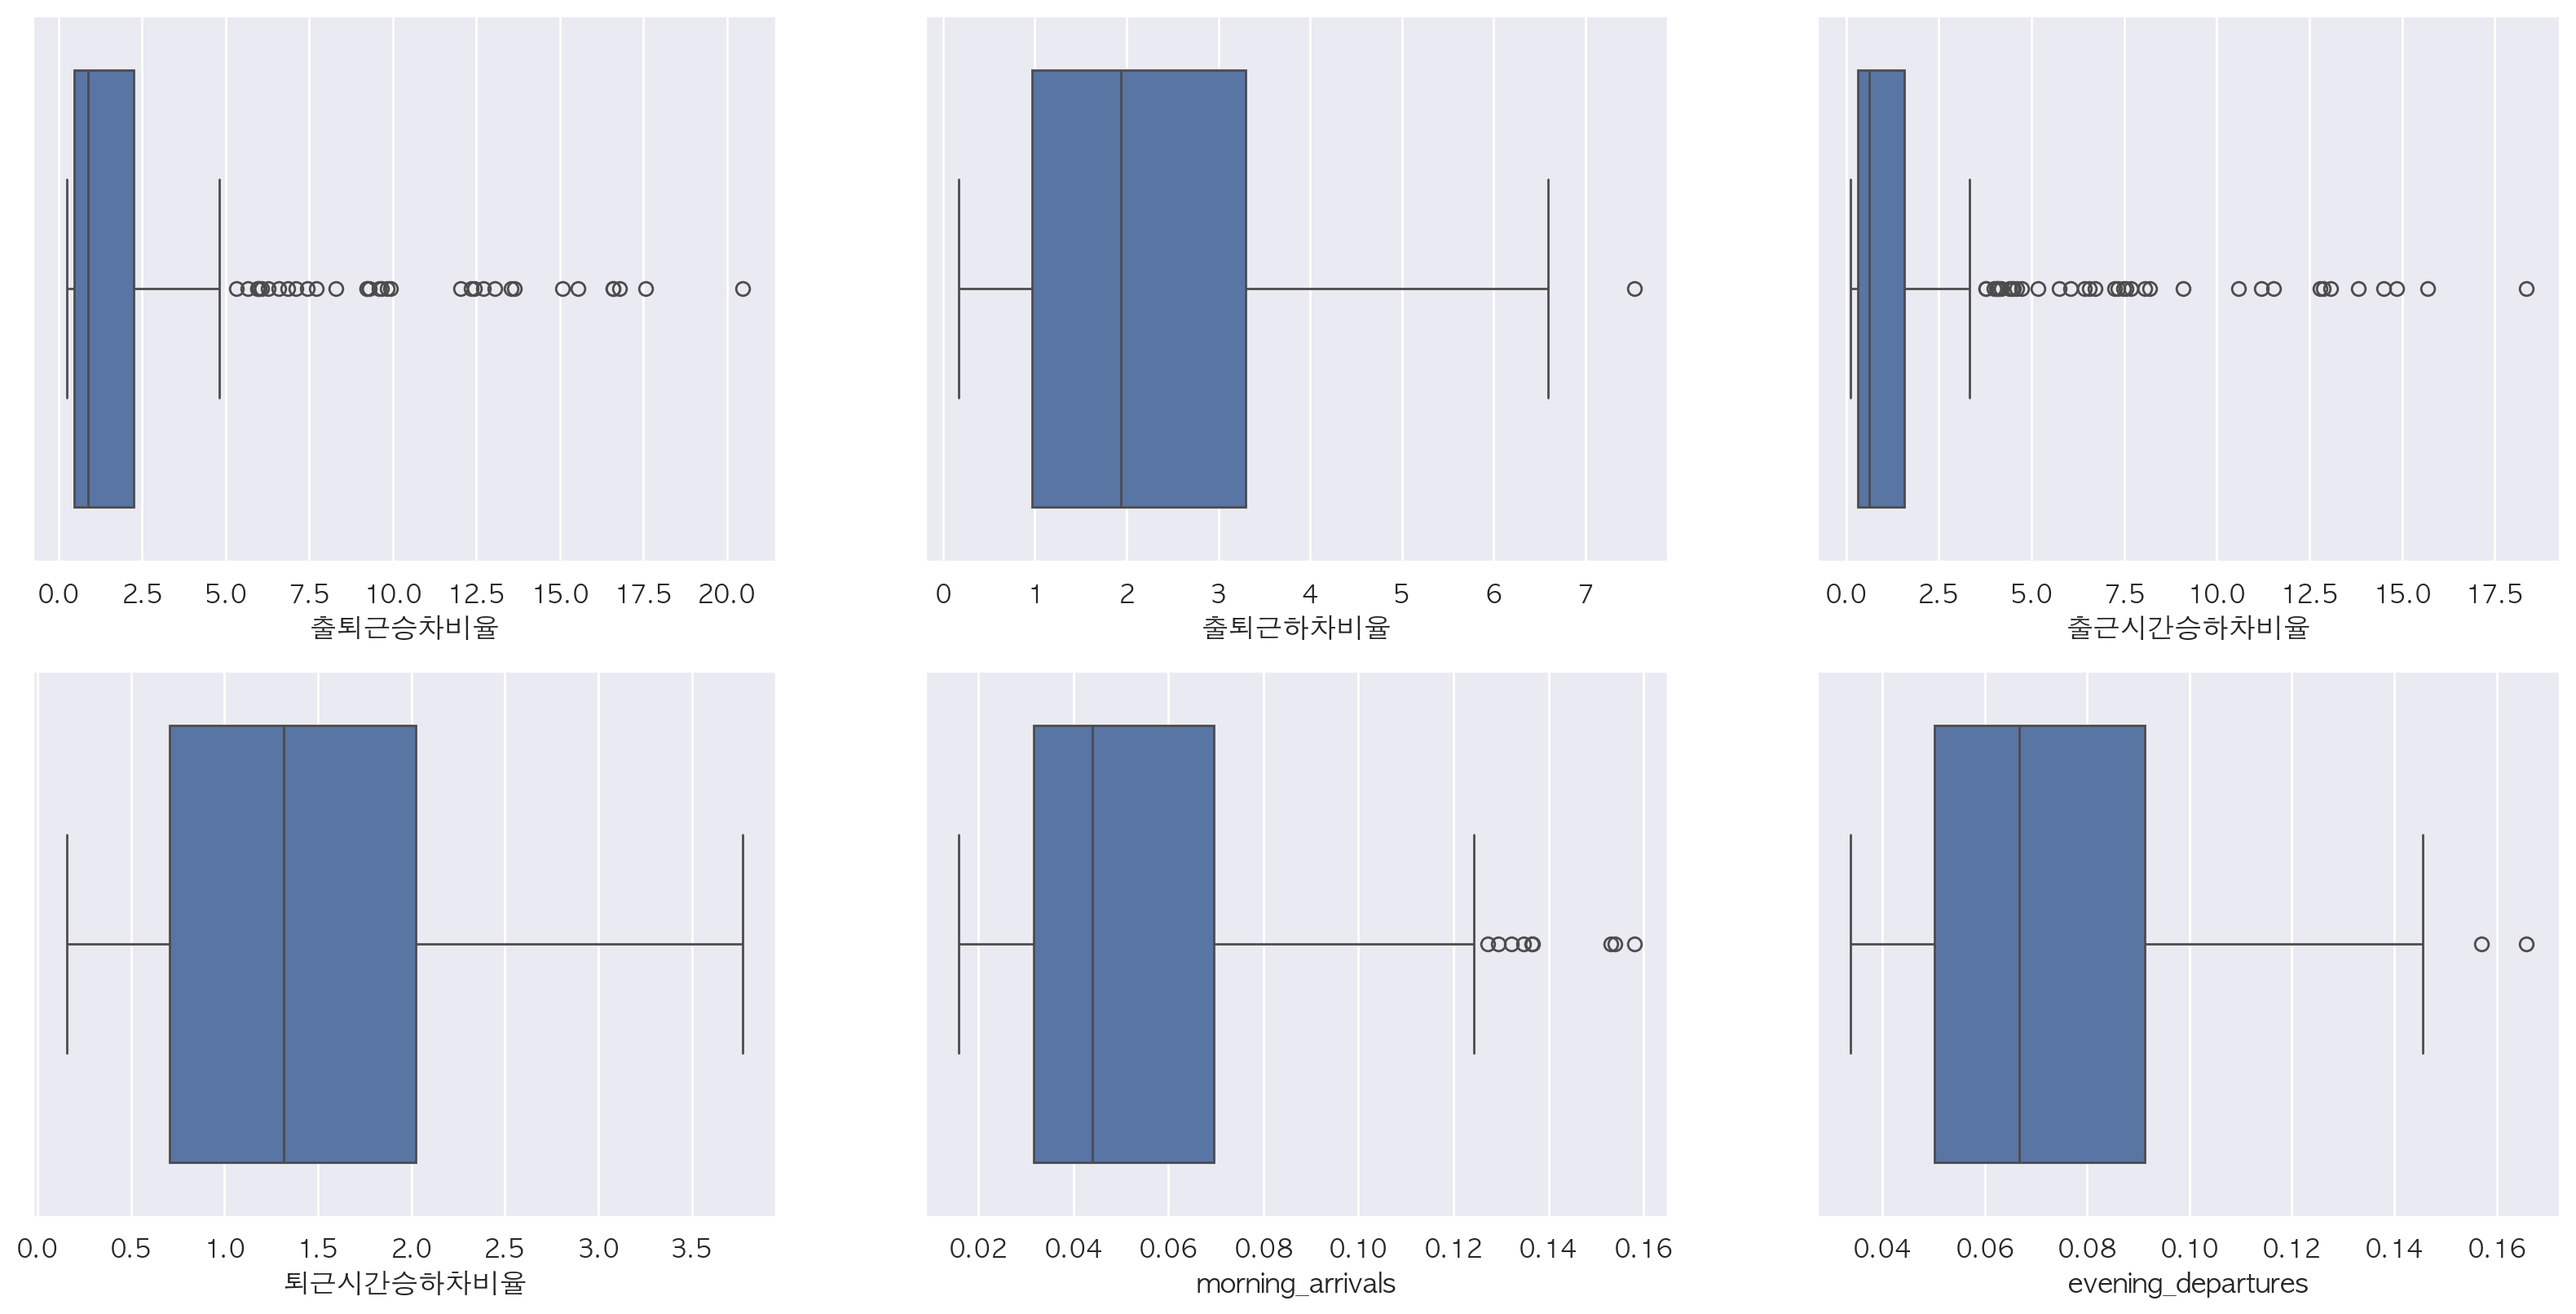

In [40]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = '출퇴근승차비율', data = df1)

plt.subplot(4,3,2)
sns.boxplot(x = '출퇴근하차비율', data = df1)

plt.subplot(4,3,3)
sns.boxplot(x = '출근시간승하차비율', data = df1)

plt.subplot(4,3,4)
sns.boxplot(x = '퇴근시간승하차비율', data = df1)

plt.subplot(4,3,5)
sns.boxplot(x = 'morning_arrivals', data = df1)

plt.subplot(4,3,6)
sns.boxplot(x = 'evening_departures', data = df1)

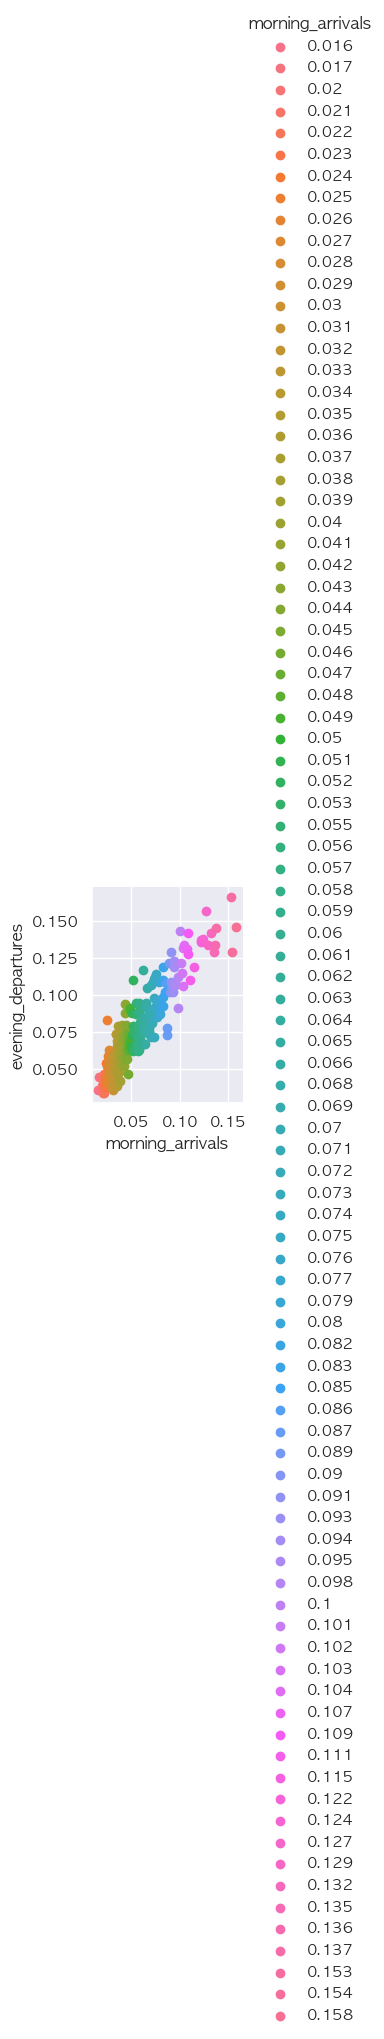

In [59]:
sns.FacetGrid(df, hue="morning_arrivals") \
   .map(plt.scatter, "morning_arrivals", "evening_departures") \
   .add_legend()

### 뚜렷한 군집을 찾아보기 어렵다

In [42]:
# Iterate over the rows and round float values
for index, row in df1.iterrows():
    for col in df1.columns[1:]:  # Exclude the first column (Location)
        df1.at[index, col] = round(row[col], 3)

In [46]:
# choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df1.loc[:, ('출퇴근승차비율',	'출퇴근하차비율',	'출근시간승하차비율',	'퇴근시간승하차비율', 'morning_arrivals', 'evening_departures')]
y = df1['evening_departures']

# X['evening_departures'] = le.fit_transform(X['morning_arrivals'])
# 에러가 발생하여 ValueError(f"y contains previously unseen labels: {str(e)}")
# 에러를 수정하려고 했지만 실패했음
X['evening_departures'] = le.fit_transform(X['evening_departures'])

# X = scaler.fit_transform(X)

y = le.transform(y)

## 업무 주거 그리고 업무 지구와 주거 지구 사이의 지역 세개로 나눠보기로 한다

In [60]:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2,
       1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2],
      dtype=int32)

In [61]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5722777241022391

이론상 1에 상당히 근접한 결과가 도출되어 높은 확률을 보여준다. 

In [62]:
# range: These are the iterations of the clustering process
# random_state: "Determines random number generation for centroid initialization."
# WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid. Source.
# Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are." Source. The value is appended to the wcss variable on each iteration.
# k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

## 그래프를 분석하여 2개의 클러스터로 진행함

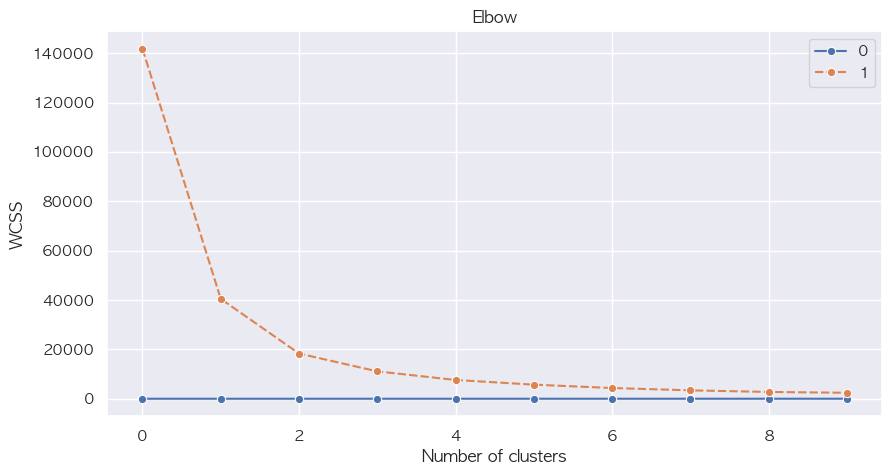

In [63]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

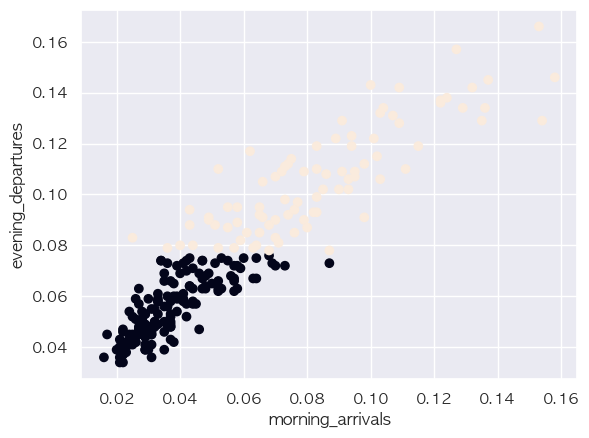

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
labels = kmeans.predict(X)
# '출퇴근승차비율',	'출퇴근하차비율',	'출근시간승하차비율',	'퇴근시간승하차비율'
plt.scatter(df['morning_arrivals'],df['evening_departures'],c = labels)
plt.xlabel('morning_arrivals')
plt.ylabel('evening_departures')
plt.show()

클러스터 분석:저녁 승차 인원비율과 아침 하차 인원비율이 둘다 높은 쪽을 도심지역으로 가정하고 높음과 낮음으로 주거지역과 업무지역을 나눈다

In [66]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2 out of 239 samples were correctly labeled.
Accuracy score: 0.01


<p>평가: 모델의 정확도가 낮다. 처음부터 데이터를 구분할 시에 주거지역과 업무지역으로 양분된 데이터를 가지고 분석을 하여야 했으나 이는 분석할 데이터를 이미 분석한 상황에서 데이터를 다시 분류를 한다는 굴레에 빠지고 만다. 성향이 그래도 상반되는 데이터를 가지고 분석을 했었으면 좋았지 않았을까 하는 생각이 들었다. 지역이 업무, 주거지역 만으로 나누어지지 않고 middleground 에 있는 지역이 있다는 점을 간과했다. 따라서 양극화되지 않은 이 데이터가 모델 데이터 분석 결과가 좋지 않은 점에 기여했다고 생각한다.</p>